# Data Cleaning

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading in the raw csv file

In [3]:
market_data_raw = pd.read_csv('beauty_market_sales.csv')

In [4]:
market_data_raw

,Unnamed: 0,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,"1,797.9",39.1,"1,815.0",38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,-
5,Subtotal,"3,857.4",84.0,"3,862.5",82.2,0.1,-1.8
6,Private label,49.5,1.1,56.2,1.2,13.6,0.1
7,Others,686.2,14.9,780.4,16.6,13.7,1.7


Renaming the weird column title to company

In [31]:
market_data = market_data_raw.rename(columns = {'Unnamed: 0' : "Company"})

Here we only are looking at the top 4 companies with clear company names, so we discard the 'Private label', 'Others', and 'Subtotal' rows

In [32]:
market_data = market_data.loc[0:4, :]
market_data

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,"1,797.9",39.1,"1,815.0",38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,-


Upon inspection, we see that the 2014 and 2015 sales in millions, as well as the share change percent columns are strings, not numerical data types. We hard code these columns and change them to floats so that we can perform statistical analysis on them

In [35]:
market_data.dtypes

Company                       object
2014_sales_millions           object
2014_market_share_percent    float64
2015_sales_millions           object
2015_market_share_percent    float64
sale_change_percent          float64
share_change_percent          object
dtype: object

In [51]:
market_data.loc[:, '2014_sales_millions'] = [1797.9, 954.7, 670.5, 262.3, 171.9]
market_data.loc[:, '2015_sales_millions'] = [1815.0, 946.1, 661.6, 263.8, 176]
market_data.loc[:, 'share_change_percent'] = [-0.5, -0.7, -0.5, -0.1, 0]

In [52]:
market_data.dtypes

Company                       object
2014_sales_millions          float64
2014_market_share_percent    float64
2015_sales_millions          float64
2015_market_share_percent    float64
sale_change_percent          float64
share_change_percent         float64
dtype: object

In [54]:
market_data

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


Our last step in cleaning this data is to save the newly cleaned data to a new csv file, which we then read in again so that we don't have to rerun the previous code next time we want to use this data.

In [59]:
market_data.to_csv('beauty_market_data.csv', index = False)

In [3]:
market_sales = pd.read_csv('beauty_market_data.csv')

In [61]:
market_sales

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


# Data Description

## Motivation
- **Why was this dataset created?**
    - This dataset was created to explore how the market of cosmetics has evolved through the year or 2015, in regards to trends in sales, market breakdown, which factors contributed to these changes, and which makeup trends might affect the market.
    
- **Who funded the creation of the dataset? **
    - The research was done by Mintel, an independent market analysis company that prides itself on supplying objective information on a whole range of markets and marketing issues.
    
## Composition
- **What are the observations (rows) and the attributes (columns)? **
    - The rows are the top cosmetics companies, and the columns are how they performed in the market, specifically: company name, 2014 sales (in millions of dollars), 2014 market share percentage, 2015 sales (in millions of dollars), 2015 market share percentage, the sale change percentage from 2014-2015, and the market share percent change from 2014-2015.
    
- **How many instances are there in the dataset? Does it contain all possible instances or is it a sample? What processes might have influenced what data was observed and recorded and what was not?**
    - The initial dataset had 7 instances, but I removed the "private labels" and "other" companies as they are not easy to use with our Amazon dataset. The data contained a note that read: "Data may not equal totals due to rounding The above figures are based on MULO sales data from Information Resources, Inc., InfoScan Reviews. MULO is defined as Multi Outlet, representative of the following channels: total U.S. Grocery, Mass, Total U.S. Drug, Total Walmart, Dollar, Military, and Club." 
    
- **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
    - Our data can be found at the same Google Drive as previously listed.
    
- **Is the data self contained or does it rely on other outside websites?**
    - Our data is self contained because it is historical data about sales in 2015, and thus would not rely on outside websites
    
- **Does this data relate to individuals? Can the individuals be identified? Are there any subpopulations that can be identified?**
    - No, the data is not related to individuals, but companies which are entities.
    
## Collection Process
- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
    - No people were involved, as the data in this specific dataset was from an Information Resrouces company.
    
- **What time frame was the data collected?**
    - This dataset focuses on company sales from 2014 to March 22, 2015.
    
## Preprocessing
- **What preprocessing was done, and how did the data come to be in the form that you are using?**
    - Refer to data cleaning appendix.
    
- **Are there are any errors, sources of noise, or redundancies in the data?**
    - None that are visible to us. The dataset is rather small and informs us of overarching/summarizing statistics, thus there is not much room for errors/noise.
 
## Uses
    
 - **Has this data been used before? If so, what for?**
     - There is no evidence that this data has been used before, however it is very likely that it has considering it is a public dataset published for people to use.
     
     
## Data Limitations

- We are only able to see the market sales of 4 well known companies, some of which are parent companies that own several beauty brands. This makes it difficult to use with our Amazon dataset which reports reviews of these smaller "child" companies. 
- The data lumps together "private labels" and "others" into separate categories, which is unclear of which companies it considers under those categories, and might have been valuable in our data analysis.
- The data only reports sales and shares for 2015 as a whole, and in the period ending March 22. Not only does this mean it does not include the whole year of 2015, but it is not specific in how the sales were in different months.
- The data only analyzes company performance in terms of market shares and sales, no other metrics.
    
    

# Exploratory Data Analysis

In [4]:
amazon = pd.read_csv('amazonreviews_beauty.csv')

In [5]:
amazon

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation
0,24767754,R1XFL3Z2OT99W8,B003LSZHQ0,192111987,"Revlon Beyond Natural Blush & Bronzer, Peach (...",3.0,0.0,N,Y,Three Stars,This blush and bronzer was no big deal. It's ...,2015-06-10,Revlon
1,28040275,R3AKWI2QG78Y6W,B00A9KBHR6,533375687,Exclusive By Revlon Crazy Shine Nail Buffer # ...,5.0,0.0,N,Y,These make your natural nails so shiny. The gr...,These make your natural nails so shiny. The g...,2015-08-28,Revlon
2,34986371,R1UU0O9IDQAJ90,B001DPMETG,105754500,Garnier SkinActive Clearly Brighter Anti-Puff ...,5.0,1.0,N,Y,This works well because it lets me massage awa...,This works well because it lets me massage awa...,2015-07-23,L'oreal
3,36407464,R1XQ88PJ7HPGYQ,B00113HO90,78786137,Neutrogena Rainbath Refreshing Shower and Bath...,5.0,0.0,N,Y,Neutrogena Rocks!!,Awesome products!!,2015-05-25,Johnson & Johnson
4,889672,R1YLPTSI256CM6,B004Y9H1QO,511887159,Maybelline New York Baby Lips Moisturizing Lip...,5.0,0.0,N,Y,Five Stars,ok,2015-02-07,L'oreal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1640914,R31SK0XHQT84KM,B0046VJTX8,184141855,"Maybelline New York Fit Me Concealer, 0.23 Flu...",5.0,0.0,N,Y,Great Buy,Love it,2015-01-25,L'oreal
39996,20245288,R2GOLYUPEIK335,B003H8182G,867777522,Maybelline ColorSensational Lip Stain,5.0,0.0,N,Y,Five Stars,I love it!!!,2015-01-03,L'oreal
39997,49693676,R1MZ7306XFSU9D,B001E96OU6,414968857,Neutrogena Oil-Free Acne Wash,5.0,0.0,N,Y,love the product,"Quick shipping, love the product, excellent pr...",2015-01-23,Johnson & Johnson
39998,51975267,R13XK4JV20GSZO,B0092GWVBE,758144053,Maybelline Color Tattoo Eyeshadow Limited Edit...,4.0,1.0,N,Y,Great for stage make-up!,We use this for our dance competition makeup. ...,2015-05-23,L'oreal


## Histograms of Star Rating Distribution Overall and by Company

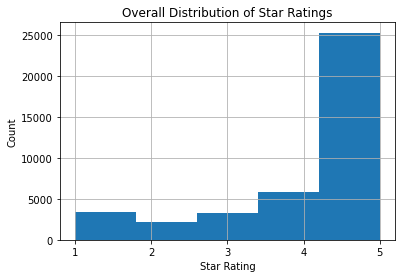

In [34]:
amazon.star_rating.hist(bins = 5)
plt.xticks(range(1, 6))
plt.xlabel('Star Rating')
plt.ylabel("Count")
plt.title("Overall Distribution of Star Ratings")
plt.show()

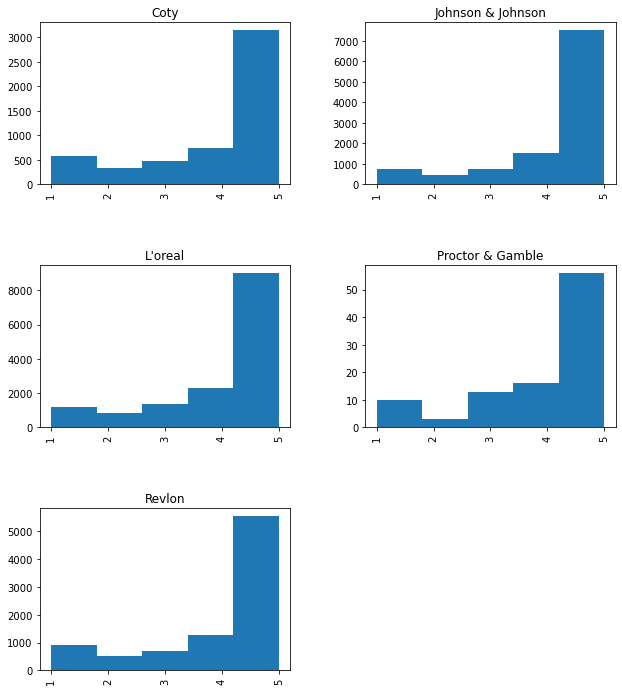

In [35]:
amazon.star_rating.hist(by=amazon.corporation, figsize = (10, 12), bins = 5)
plt.title('Distribution of Star Ratings by Company')
plt.show()

## Basic Statistics of Star Ratings by Corporation

### All Companies

In [38]:
amazon[['star_rating']].agg([np.mean, np.median, np.std, np.var])

,star_rating
mean,4.184950
median,5.000000
std,1.290905
var,1.666435


### Breakdown by Company

In [28]:
amazon.groupby('corporation')['star_rating'].agg([np.mean, np.median, np.std, np.var])

,mean,median,std,var
corporation,,,,
Coty,4.050777,5.0,1.386499,1.922379
Johnson & Johnson,4.323308,5.0,1.198936,1.437447
L'oreal,4.170827,5.0,1.272123,1.618296
Proctor & Gamble,4.071429,5.0,1.325795,1.757732
Revlon,4.118370,5.0,1.355196,1.836557


In [41]:
amazon['review_length'] = amazon['review_body'].str.len()

In [107]:
amazon.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation,review_length
0,24767754,R1XFL3Z2OT99W8,B003LSZHQ0,192111987,"Revlon Beyond Natural Blush & Bronzer, Peach (...",3.0,0.0,N,Y,Three Stars,This blush and bronzer was no big deal. It's ...,2015-06-10,Revlon,72.0
1,28040275,R3AKWI2QG78Y6W,B00A9KBHR6,533375687,Exclusive By Revlon Crazy Shine Nail Buffer # ...,5.0,0.0,N,Y,These make your natural nails so shiny. The gr...,These make your natural nails so shiny. The g...,2015-08-28,Revlon,189.0
2,34986371,R1UU0O9IDQAJ90,B001DPMETG,105754500,Garnier SkinActive Clearly Brighter Anti-Puff ...,5.0,1.0,N,Y,This works well because it lets me massage awa...,This works well because it lets me massage awa...,2015-07-23,L'oreal,119.0
3,36407464,R1XQ88PJ7HPGYQ,B00113HO90,78786137,Neutrogena Rainbath Refreshing Shower and Bath...,5.0,0.0,N,Y,Neutrogena Rocks!!,Awesome products!!,2015-05-25,Johnson & Johnson,18.0
4,889672,R1YLPTSI256CM6,B004Y9H1QO,511887159,Maybelline New York Baby Lips Moisturizing Lip...,5.0,0.0,N,Y,Five Stars,ok,2015-02-07,L'oreal,2.0


## Review Body Length Analysis

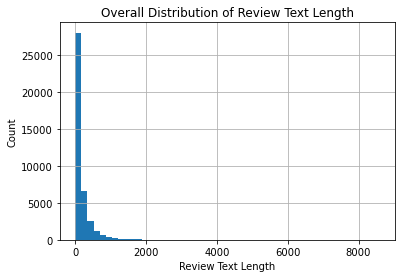

In [48]:
amazon.review_length.hist(bins=50)
plt.xlabel('Review Text Length')
plt.ylabel("Count")
plt.title("Overall Distribution of Review Text Length")
plt.show()

In [47]:
len(amazon[amazon['review_length'] > 2000])

68

Looking at the overall review text distribution, we see that most reviews are less than 2000 characters, but the chart is being skewed by 68 observations. Let's take a look at this histogram when we only consider the reviews with less than 2000 characters.

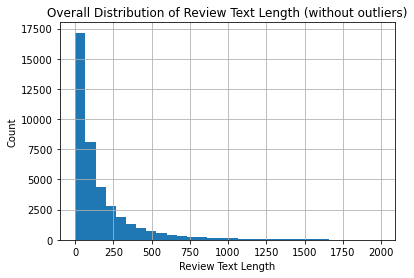

In [52]:
amazon[amazon['review_length'] < 2000].review_length.hist(bins=30)
plt.xlabel('Review Text Length')
plt.ylabel("Count")
plt.title("Overall Distribution of Review Text Length (without outliers)")
plt.show()

Looking at this histogram, we still see that most reviews are 250 words or less.

Now analyzing review length by distribution, we will also only look at reviews with 1000 characters or less separately.

## Histograms of Review Text Lengths of Reviews with <1000 Characters

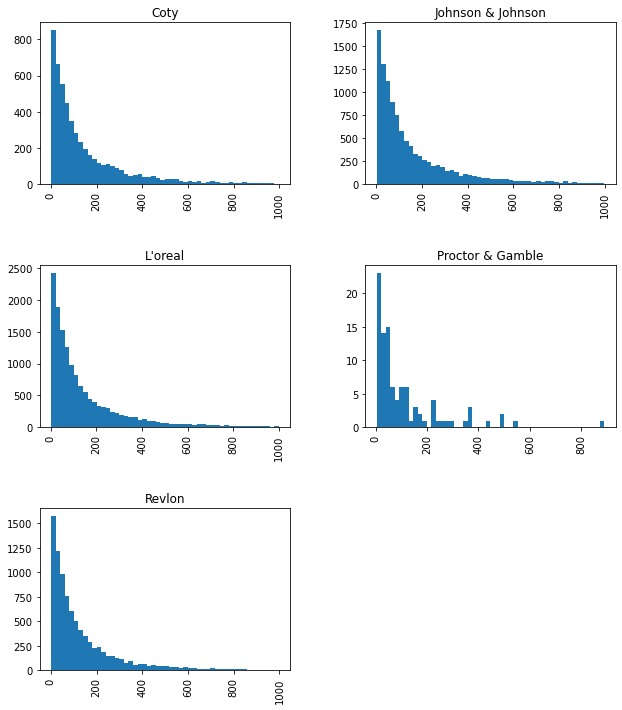

In [78]:
amazon[amazon['review_length'] < 1000].review_length.hist(by=amazon.corporation, figsize = (10, 12), bins = 50)
plt.show()

Analyzing how many reviews each company had over 1000 characters separately, as there are far fewer and were harder to see in a comprehensive histogram of all reviews. Note that P&G had no reviews with over 1000 characters.

## Histogram of the Review Text Length of Reviews with > 1000 Characters

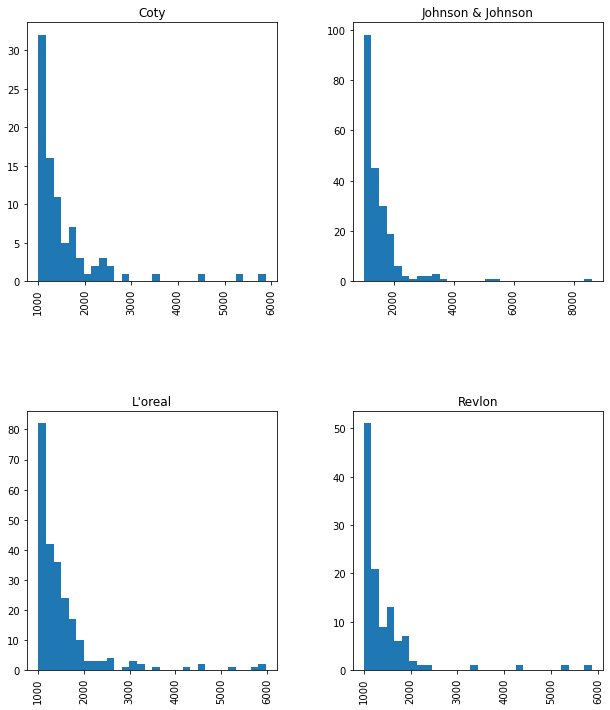

In [77]:
amazon[amazon['review_length'] > 1000].review_length.hist(by=amazon.corporation, figsize = (10, 12), bins = 30)
plt.show()

## Examining the Correlation Between Review Length & Star Rating

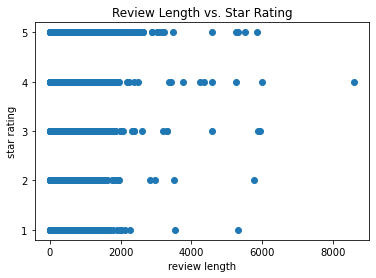

In [88]:
plt.scatter(amazon['review_length'], amazon['star_rating'])
plt.yticks(range(1, 6)) #only include ticks for the whole numbers of the star ratings
plt.xlabel("review length")
plt.ylabel('star rating')
plt.title('Review Length vs. Star Rating')
plt.show()

In [87]:
amazon['review_length'].corr(amazon['star_rating'])

-0.10873734795964711

Based on the graph and correlation coefficient, there is virtually no correlation between review length and star ratings. This is contrary to our prediction that longer reviews might indicate extremely positive/negative ratings.

## Company Market Performance Analysis

In [89]:
market_sales

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


Now we will compare the sales between 2014-2015 by company, as well as their sales/share percentage change.

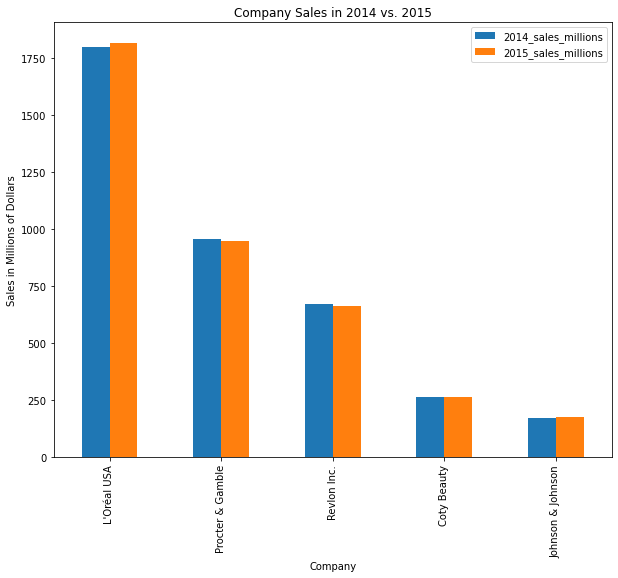

In [106]:
market_sales.plot(x = "Company", y= ['2014_sales_millions', '2015_sales_millions'], kind = 'bar', legend = True, figsize = (10, 8))
plt.ylabel("Sales in Millions of Dollars")
plt.title("Company Sales in 2014 vs. 2015")
plt.show()

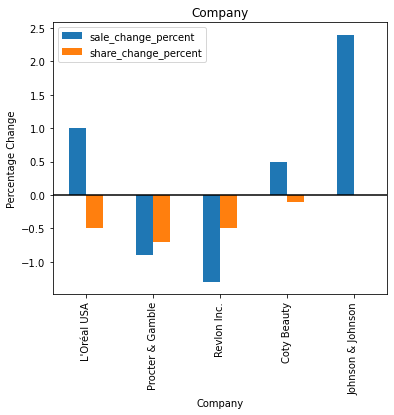

In [105]:
market_sales.plot(x = "Company", y= ['sale_change_percent', 'share_change_percent'], kind = 'bar', legend = True, figsize = (6, 5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel("Percentage Change")
plt.title("Company")
plt.show()

Here we see some interesting data. While the sale change percent grew for L'Oreal and Coty Beauty, their share percentages declined. Additionally, Johnson & Johnson sale percentage grew far more than any other company. It is also noteable that J&J's share percentage did not change at all. Another interesting observation is that while J&J had the largest sales percentage increase, their overall sales still remained the lowest in terms of millions of dollars.